In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
warnings.filterwarnings('ignore')

In [6]:
x = np.linspace(0, 10, 11)

In [7]:
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

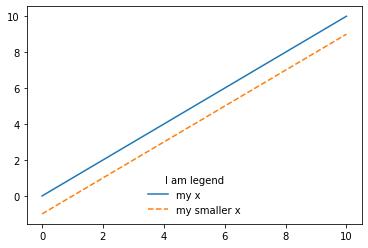

In [13]:
plt.plot(x, x, '-', label = 'my x')
plt.plot(x, x-1, '--', label = 'my smaller x')
plt.legend(title='I am legend', loc='lower center', frameon=False)

Text(8.5, 1.5, 'my favorite number')

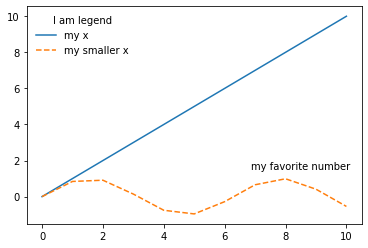

In [17]:
plt.plot(x, x, '-', label = 'my x')
plt.plot(x, np.sin(x), '--', label = 'my smaller x')
plt.legend(title='I am legend', loc='upper left', frameon=False)
plt.text(8.5, 1.5, 'my favorite number', ha='center')

Text(8, 5, 'my first annotation')

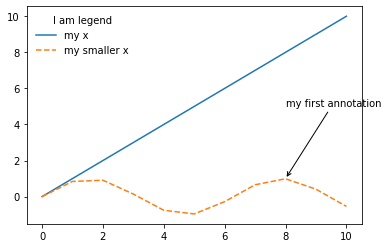

In [19]:
plt.plot(x, x, '-', label = 'my x')
plt.plot(x, np.sin(x), '--', label = 'my smaller x')
plt.legend(title='I am legend', loc='upper left', frameon=False)
plt.annotate('my first annotation', xy = (8,1), xytext = (8, 5), arrowprops = dict(arrowstyle = '->'))

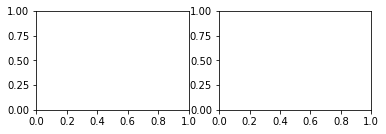

In [21]:
plt.subplot(2, 2, 1)
plt.subplot(2, 2, 2)

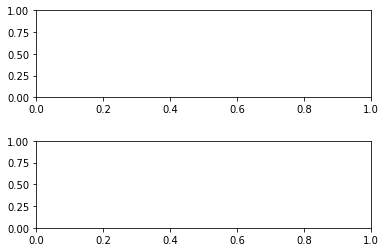

In [23]:
plt.figure().subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.subplot(2, 1, 1)
plt.subplot(2, 1, 2)

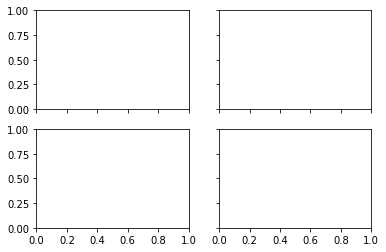

In [24]:
fig, axes = plt.subplots(2,2, sharex = 'col', sharey = 'row')

(array([ 3.,  5.,  6.,  7., 13.,  9.,  8.,  5.,  1.,  3.]),
 array([-1.68902703, -1.29652181, -0.90401659, -0.51151137, -0.11900616,
         0.27349906,  0.66600428,  1.05850949,  1.45101471,  1.84351993,
         2.23602515]),
 <a list of 10 Patch objects>)

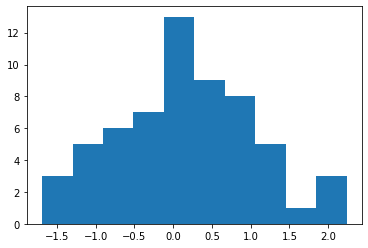

In [25]:
y = np.random.randn(60)
plt.hist(y)

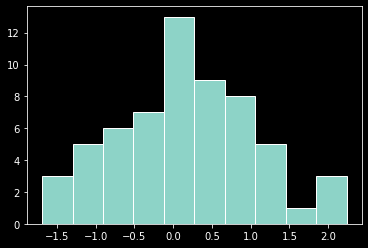

In [26]:
with plt.style.context('dark_background'):
    plt.hist(y, edgecolor = 'white')

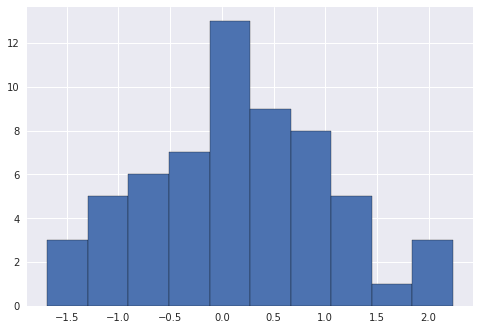

In [27]:
with plt.style.context('seaborn'):
    plt.hist(y, edgecolor = 'black')

In [32]:
df1 = pd.read_csv('data/nasa_gistemp.csv', index_col=0, skiprows=1)

In [33]:
df1.head()

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  \
Year                                                                           
1880 -0.17 -0.23 -0.08 -0.15 -0.08  -.20  -.17  -.09  -.13  -.22  -.21  -.16   
1881 -0.19 -0.13  0.04  0.06  0.07  -.17   .01  -.02  -.14  -.20  -.17  -.05   
1882  0.18  0.16  0.06 -0.15 -0.13  -.21  -.15  -.06  -.13  -.23  -.15  -.34   
1883 -0.28 -0.35 -0.11 -0.17 -0.16  -.07  -.05  -.12  -.20  -.10  -.21  -.10   
1884 -0.12 -0.06 -0.35 -0.39 -0.33  -.35  -.31  -.26  -.26  -.24  -.32  -.30   

       J-D   D-N   DJF   MAM   JJA   SON  
Year                                      
1880  -.16   ***   *** -0.10  -.15  -.19  
1881  -.07  -.08  -.16  0.06  -.06  -.17  
1882  -.10  -.07   .09 -0.08  -.14  -.17  
1883  -.16  -.18  -.32 -0.15  -.08  -.17  
1884  -.27  -.26  -.09 -0.36  -.30  -.27

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1880 to 2020
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Jan     141 non-null    float64
 1   Feb     141 non-null    float64
 2   Mar     141 non-null    float64
 3   Apr     141 non-null    float64
 4   May     141 non-null    float64
 5   Jun     141 non-null    object 
 6   Jul     141 non-null    object 
 7   Aug     141 non-null    object 
 8   Sep     141 non-null    object 
 9   Oct     141 non-null    object 
 10  Nov     141 non-null    object 
 11  Dec     141 non-null    object 
 12  J-D     141 non-null    object 
 13  D-N     141 non-null    object 
 14  DJF     141 non-null    object 
 15  MAM     141 non-null    float64
 16  JJA     141 non-null    object 
 17  SON     141 non-null    object 
dtypes: float64(6), object(12)
memory usage: 20.9+ KB


In [37]:
df1.isnull().sum()

Jan    0
Feb    0
Mar    0
Apr    0
May    0
Jun    0
Jul    0
Aug    0
Sep    0
Oct    0
Nov    0
Dec    0
J-D    0
D-N    0
DJF    0
MAM    0
JJA    0
SON    0
dtype: int64

In [43]:
def cleanup(x):
    try:
        return float(x)
    except:
        return np.NaN

In [44]:
for columns in df1.columns:
    df1[columns] = df1[columns].apply(cleanup)
    df1[columns].fillna(method='ffill', inplace=True)
    df1[columns].fillna(method='bfill', inplace=True)    

In [45]:
df1

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  \
Year                                                                           
1880 -0.17 -0.23 -0.08 -0.15 -0.08 -0.20 -0.17 -0.09 -0.13 -0.22 -0.21 -0.16   
1881 -0.19 -0.13  0.04  0.06  0.07 -0.17  0.01 -0.02 -0.14 -0.20 -0.17 -0.05   
1882  0.18  0.16  0.06 -0.15 -0.13 -0.21 -0.15 -0.06 -0.13 -0.23 -0.15 -0.34   
1883 -0.28 -0.35 -0.11 -0.17 -0.16 -0.07 -0.05 -0.12 -0.20 -0.10 -0.21 -0.10   
1884 -0.12 -0.06 -0.35 -0.39 -0.33 -0.35 -0.31 -0.26 -0.26 -0.24 -0.32 -0.30   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2016  1.17  1.38  1.36  1.12  0.96  0.82  0.85  1.01  0.91  0.88  0.91  0.86   
2017  1.03  1.14  1.16  0.94  0.90  0.73  0.83  0.87  0.79  0.90  0.89  0.95   
2018  0.82  0.85  0.90  0.90  0.83  0.79  0.83  0.77  0.81  1.01  0.83  0.92   
2019  0.93  0.96  1.18  1.02  0.86  0.93  0.94  0.94  0.92  1.02  1.00  1.11   
2020  1.17  1.25  1.19  1.14  1.02  0.93  0.94  0.94  0.92  1.02  1.00  1.11   

       J-D   D-N   DJF   MAM   JJA   SON  
Year                                      
1880 -0.16 -0.08 -0.16 -0.10 -0.15 -0.19  
1881 -0.07 -0.08 -0.16  0.06 -0.06 -0.17  
1882 -0.10 -0.07  0.09 -0.08 -0.14 -0.17  
1883 -0.16 -0.18 -0.32 -0.15 -0.08 -0.17  
1884 -0.27 -0.26 -0.09 -0.36 -0.30 -0.27  
...    ...   ...   ...   ...   ...   ...  
2016  1.02  1.04  1.24  1.15  0.89  0.90  
2017  0.93  0.92  1.01  1.00  0.81  0.86  
2018  0.85  0.86  0.87  0.88  0.80  0.88  
2019  0.98  0.97  0.94  1.02  0.94  0.98  
2020  0.98  0.97  1.18  1.12  0.94  0.98  

[141 rows x 18 columns]

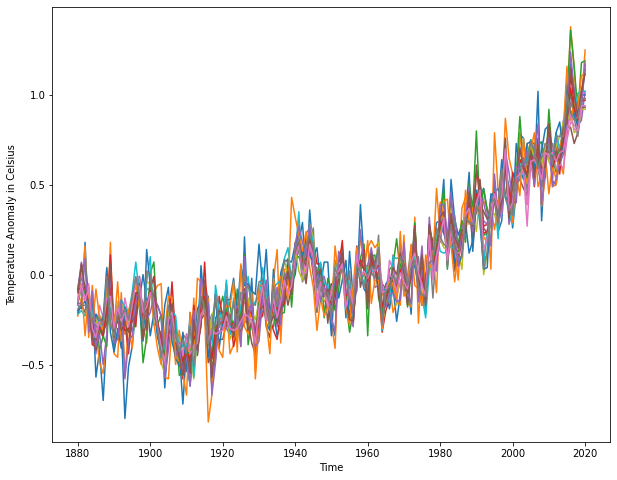

In [46]:
plt.figure(figsize = (10, 8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly in Celsius')
plt.plot(df1)

In [47]:
plt.figure(figsize= (10, 8))
sns.lineplot(data = [df1.loc['1913':, 'Jun'], df1.loc['1913':, 'Dec']])

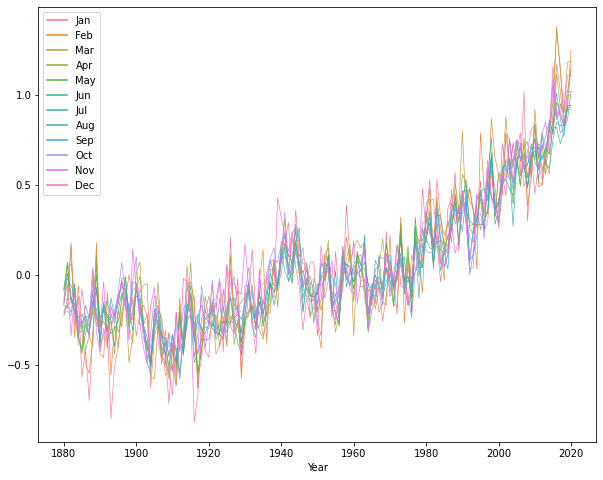

In [51]:
plt.figure(figsize= (10, 8))
sns.lineplot(data = df1.loc[:, 'Jan':'Dec'], linewidth = 0.6, dashes = False)

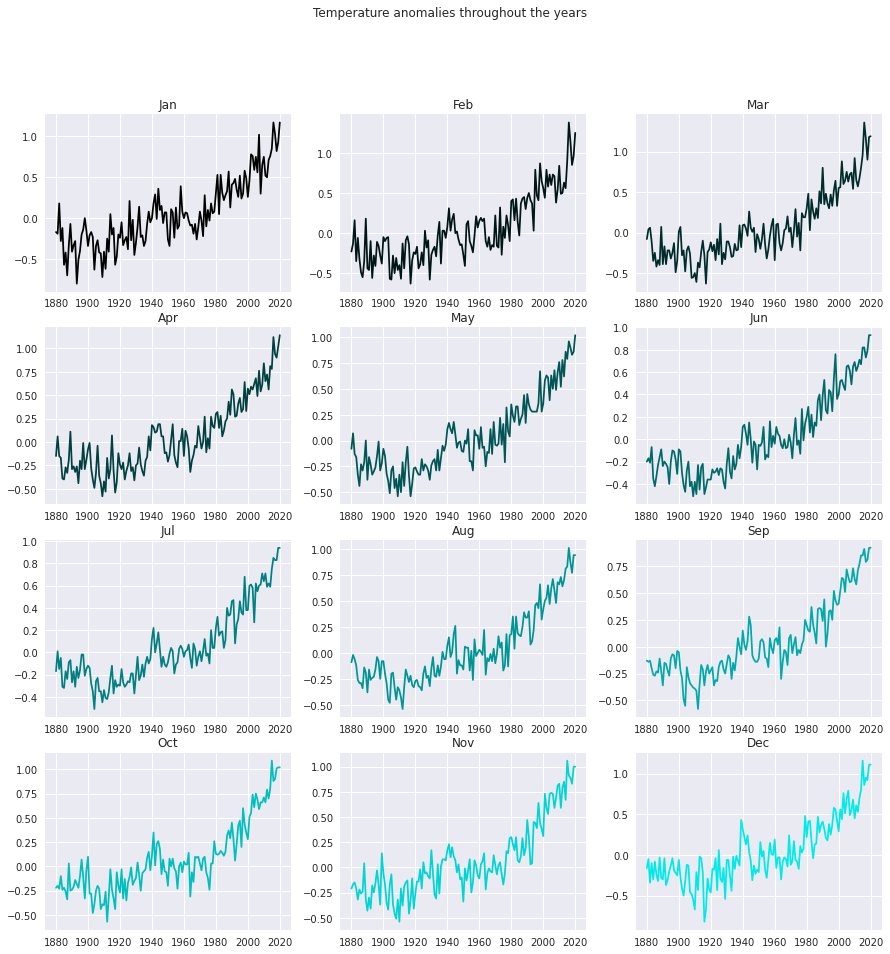

In [57]:
with plt.style.context('seaborn'):
    fig, axes = plt.subplots(4, 3, figsize = (15, 15))
    fig.suptitle('Temperature anomalies throughout the years')
    col = 0
    for i in range(4):
        for j in range(3):
            axes[i, j].plot(df1.index, df1.loc[:,df1.columns[col]], color = (0, col/12, col/12, 1))
            axes[i, j].set_title(df1.columns[col])
            col += 1

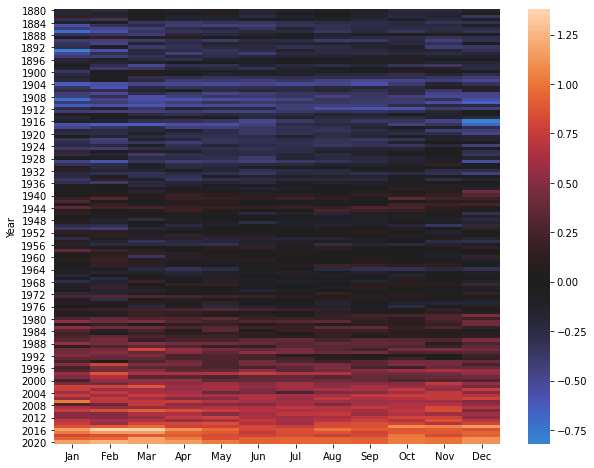

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.iloc[:,0:12], center=0)

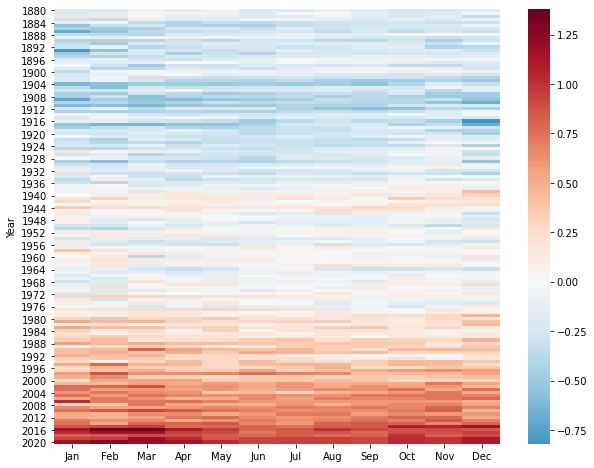

In [60]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.iloc[:,0:12], cmap = 'RdBu_r', center=0)

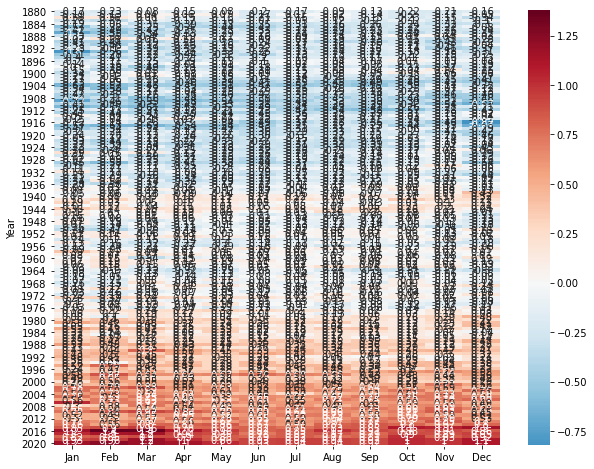

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.iloc[:,0:12], cmap = 'RdBu_r', center=0, annot=True)

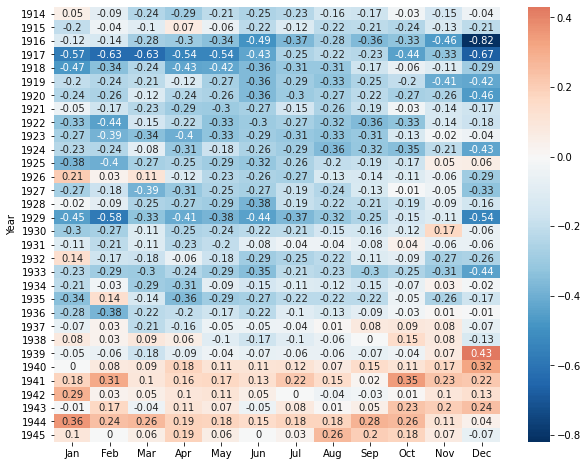

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.loc['1914':'1945','Jan':'Dec'], cmap = 'RdBu_r', center=0, annot=True)

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.loc['2000':'2019','Jan':'Dec'], cmap = 'RdBu_r', center=0, annot=True)

In [66]:
pip install chart_studio

     |████████████████████████████████| 64 kB 717 kB/s eta 0:00:011
     |████████████████████████████████| 61 kB 676 kB/s eta 0:00:011
     |████████████████████████████████| 11.5 MB 6.3 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 30.2 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 16.1 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 32.2 MB/s eta 0:00:01
     |████████████████████████████████| 156 kB 27.5 MB/s eta 0:00:01
Using legacy setup.py install for retrying, since package 'wheel' is not installed.
    Running setup.py install for retrying ... done
Note: you may need to restart the kernel to use updated packages.


In [67]:
import plotly.graph_objects as go

In [69]:
go.Figure(data = go.Heatmap(z = df1, x = df1.columns[0:12], y = df1.index, colorscale = 'rdbu', reversescale=True))

In [70]:
fig = go.Figure()
col = 0
for col in range(12):
    fig.add_trace(go.Scatter(x = df1.index, y = df1.loc[:,df1.columns[col]], name = df1.columns[col]))
    col += 1
fig.show()